In [1]:
import pandas as pd 

data = pd.read_csv("../data/clean_weather.csv", index_col=0)
data = data.ffill()

data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [2]:
data.shape

(13509, 4)

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

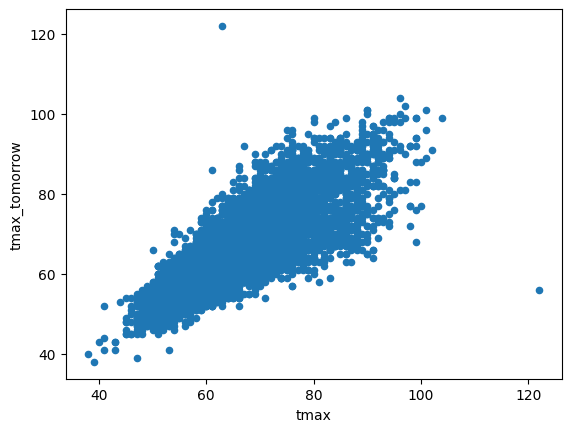

In [3]:
data.plot.scatter("tmax", "tmax_tomorrow")

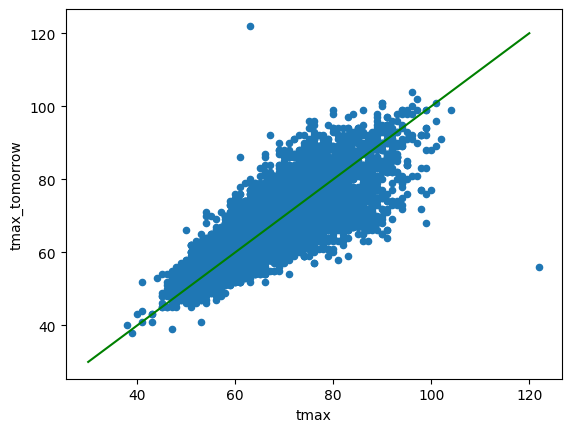

In [4]:
import matplotlib.pyplot as plt

data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot([30, 120], [30, 120], "green")

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[["tmax"]], data["tmax_tomorrow"])

LinearRegression()

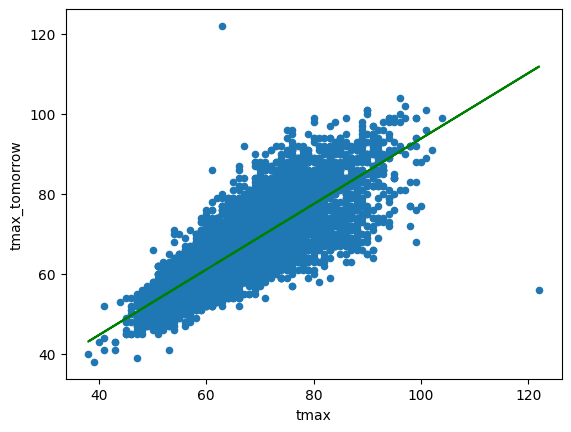

In [6]:
data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot(data["tmax"], lr.predict(data[["tmax"]]), "green")

In [7]:
print(f"Weight: {lr.coef_[0]:.2f}")
print(f"Bias: {lr.intercept_:.2f}")

Weight: 0.82
Bias: 11.99


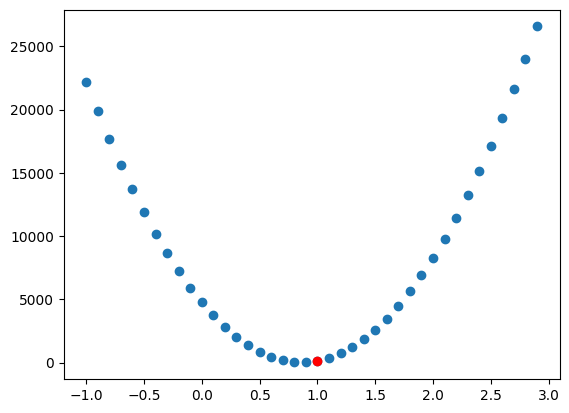

In [8]:
import numpy as np

loss = lambda w, y: ((w * 80 + 11.99) - y) ** 2
y = 81

ws = np.arange(-1, 3, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), 'ro')

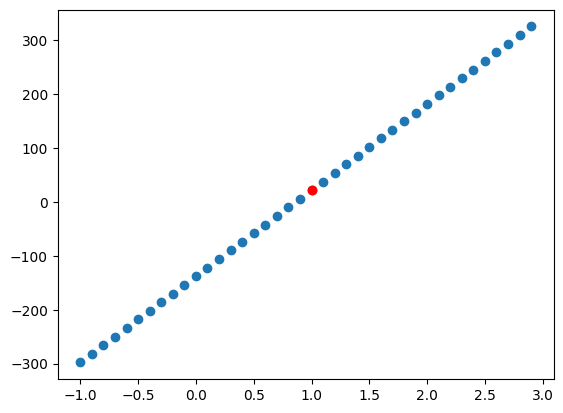

In [9]:
gradient = lambda w, y: ((w * 80 + 11.99) - y) * 2
gradients = gradient(ws, y)

plt.scatter(ws, gradients)
plt.plot(1, gradient(1,y), 'ro')

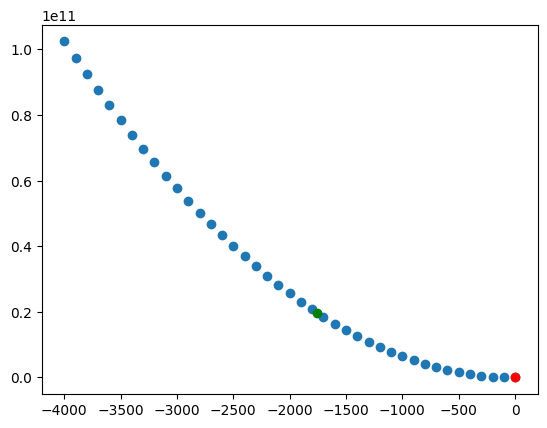

In [10]:
ws = np.arange(-4000, 100, 100)
losses = loss(ws, y)

plt.scatter(ws, losses)

plt.plot(1, loss(1, y), 'ro')
new_weight = 1 - gradient(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), 'go')

 loss(1, y)              120.78009999999989
 gradient(1,y)           21.97999999999999
 1 - gradient(1, y) * 80 -1757.3999999999992
 loss(new_weight, y)      19785519734.220085


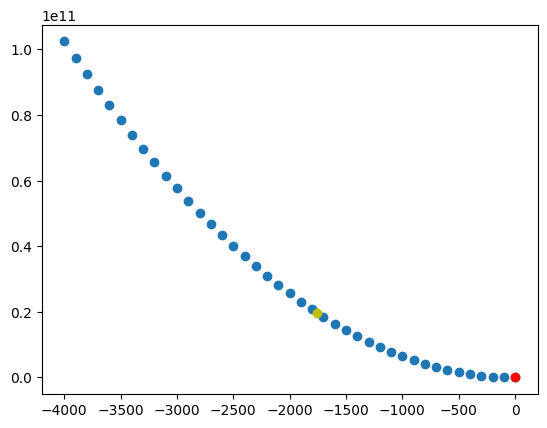

In [11]:
ws = np.arange(-4000, 100, 100)
losses = loss(ws, y)

plt.scatter(ws, losses)

plt.plot(1, loss(1, y), 'ro')
new_weight = 1 - gradient(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), 'yo')

print(f' loss(1, y)              {loss(1, y)}')
print(f' gradient(1,y)           {gradient(1, y)}')
print(f' 1 - gradient(1, y) * 80 {1 - gradient(1, y) * 80}')
print(f' loss(new_weight, y)      {loss(new_weight, y)}')

1 - lr * gradient(1, y) * 80  =  0.91208


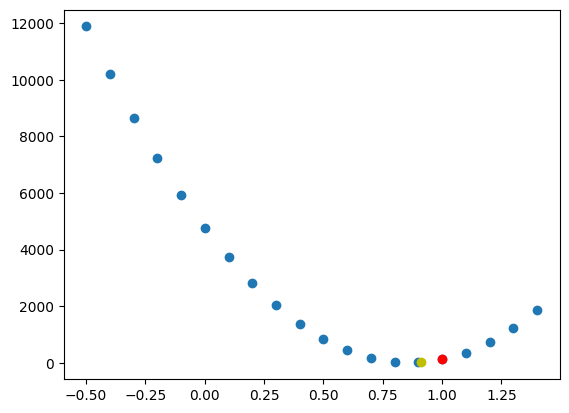

In [12]:
ws = np.arange(-.5, 1.5, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)

plt.plot(1, loss(1, y), 'ro')
lr = 5e-5
new_weight = 1 - lr * gradient(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), 'yo')

print(f'1 - lr * gradient(1, y) * 80  =  {1 - lr * gradient(1, y) * 80}')